In [3]:
import pandas as pd
df = pd.read_csv('mon_fichier.csv')

In [4]:
df.head()

,Age,Gender,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Response,Recurred,Adenopathy_Extensive,Adenopathy_Left,Adenopathy_No,Adenopathy_Posterior,Adenopathy_Right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary
0,27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,34,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,30,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,62,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,62,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [6]:
# Separate features (X) and target (y)
X = df.drop('Recurred', axis=1)
y = df['Recurred']


In [8]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 306
Testing samples: 77


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create the model with hyperparameters
model = DecisionTreeClassifier(
    max_depth=4,         # limit depth to prevent overfitting
    criterion='entropy', # measure of split quality
    random_state=42
)

# Train (fit) the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [11]:
# Predict the class labels for test data
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Print precision, recall, f1-score, etc.
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



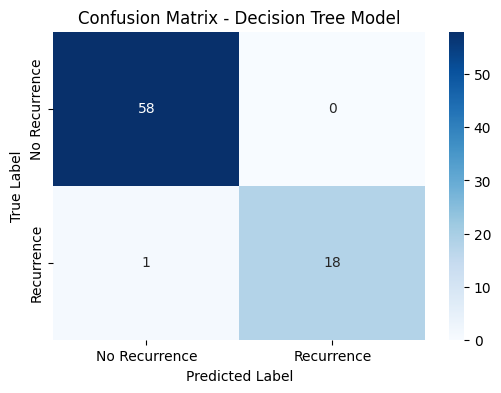

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Define labels for the classes (change if yours are different)
labels = ['No Recurrence', 'Recurrence']

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

# Step 4: Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()


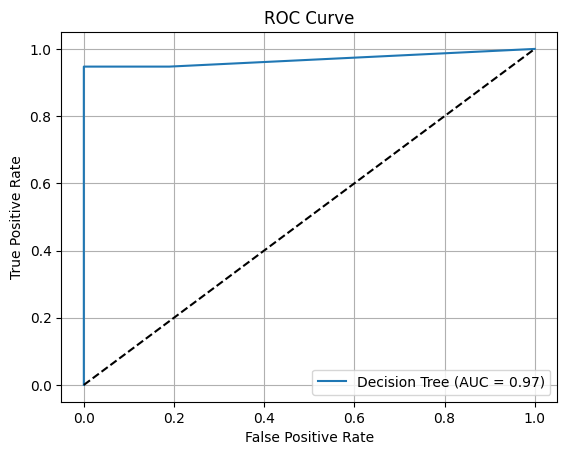

In [14]:
# ROC AUC Score
y_proba = model.predict_proba(X_test)[:, 1]  # Get probability for class 1
roc_auc = roc_auc_score(y_test, y_proba)
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()